In [1]:
#Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_training = pd.read_csv("c:\\Kaggle\\Titanic\\train.csv")
df_test = pd.read_csv("C:\\Kaggle\\Titanic\\test.csv")

In [3]:
df_training.duplicated().sum()

0

In [4]:
#Pclass = Ticket class,SibSP = No. spouses/siblings aboard the titanic, Parch = No. of parents/children
df_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Checking the count of each values to determine the steps
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
#Continuation of Last Cell
print(df_training.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
#Importing Imputer to deal with missing values and creating the imputer
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy='mean')
embarked_impute = SimpleImputer(strategy='most_frequent')
fare_impute = SimpleImputer(strategy='mean')

In [10]:
#Imputing Missing Values
df_training['Age'] = age_imputer.fit_transform(df_training['Age'].values.reshape(-1,1))
df_training['Embarked'] = embarked_impute.fit_transform(df_training['Embarked'].values.reshape(-1,1))
df_test['Fare'] = fare_impute.fit_transform(df_test['Fare'].values.reshape(-1,1))

In [11]:
#Checking for null values
df_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

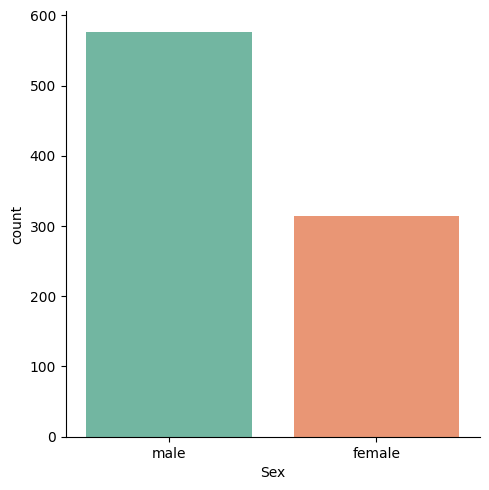

In [12]:
#Checking the passengers on the Titanic
sns.catplot(x='Sex',data=df_training,kind='count',palette='Set2',hue='Sex',legend=False)

In [13]:
#Checking the Survival rate by gender

women = df_training[df_training['Sex']=='female']["Survived"]
women_survival_rate = (sum(women)/len(women)).__round__(2)
men = df_training[df_training['Sex']=='male']["Survived"]
men_survival_rate = (sum(men)/len(men)).__round__(2)
print("Women Survival Rate=",women_survival_rate)
print("Men Survival Rate=",men_survival_rate)

Women Survival Rate= 0.74
Men Survival Rate= 0.19


In [14]:
#Checking ages
print("Count of Children =",df_training[df_training['Age'] <= 14].shape[0])
print("Count of Youth =", df_training[(df_training['Age'] >=15) & (df_training['Age'] <= 24)].shape[0])
print("Count of Adults =", df_training[(df_training['Age'] >= 25) & (df_training['Age'] <= 64)].shape[0])
print("Count of Seniors =",df_training[df_training['Age']>= 65.0].shape[0])

Count of Children = 77
Count of Youth = 199
Count of Adults = 602
Count of Seniors = 11


In [15]:
#Creating age Brackets
def age_brackets(row):
    if row['Age'] <= 14.0:
        return 0
    elif (row['Age'] >= 15.0) & (row['Age'] <= 24.0):
        return 1
    elif (row['Age'] >= 25.0) & (row['Age'] <= 64.0):
        return 2
    else:
        return 3

df_training['Age_bracket'] = df_training.apply(age_brackets,axis=1)
df_test['Age_bracket'] = df_test.apply(age_brackets,axis=1)
df_training['Age_bracket'].value_counts()

2    602
1    199
0     77
3     13
Name: Age_bracket, dtype: int64

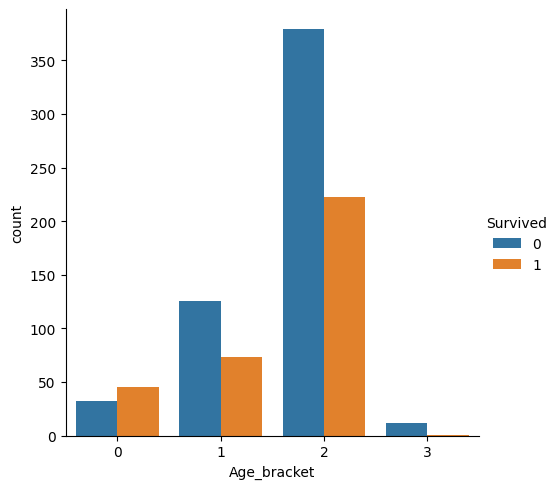

In [16]:
#Checking Survival by age
sns.catplot(data=df_training,x='Age_bracket',hue='Survived',kind='count')

In [17]:
#Creating Family size and dropping sibsp and Parch columns

df_training['Family Size'] = df_training['SibSp'] + df_training['Parch']
df_test['Family Size'] = df_test['SibSp'] + df_test['Parch']

df_training = df_training.drop(['SibSp','Parch'],axis=1)
df_test = df_test.drop(['SibSp','Parch'],axis=1)

C:\Users\Vista\AppData\Local\Temp\ipykernel_26572\3452919727.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_training.corr(),annot=True)


<AxesSubplot: >

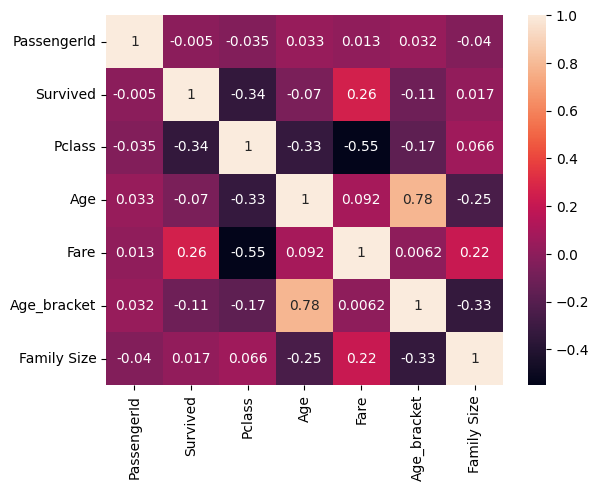

In [18]:
sns.heatmap(df_training.corr(),annot=True)

In [19]:
#One Hot Encoding the Embarked column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(),['Embarked']),remainder='passthrough',verbose_feature_names_out=False)
transformed = transformer.fit_transform(df_training)
df_training = pd.DataFrame(transformed,columns=transformer.get_feature_names_out())
transformed_test = transformer.fit_transform(df_test)
df_test = pd.DataFrame(transformed_test,columns=transformer.get_feature_names_out())

In [20]:
df_training.head()

,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Age_bracket,Family Size
0,0.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,NaN,1,1
1,1.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,2,1
2,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.925,NaN,2,0
3,0.0,0.0,1.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1,C123,2,1
4,0.0,0.0,1.0,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.05,NaN,2,0


In [21]:
df_training['Sex'] = df_training['Sex'].apply(lambda x: 0 if x =="male" else 1)
df_test['Sex'] = df_test['Sex'].apply(lambda x: 0 if x =="male" else 1)

In [22]:
import re

# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Create a list of datasets
data = [df_training, df_test]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    
    # Extract the first sequence of letters which represents the Deck and map it to a number
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    
    # Fill missing Deck values with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)
    
    # Convert Deck to an integer type
    dataset['Deck'] = dataset['Deck'].astype(int)
    
    # Drop the Cabin column as it's no longer needed
    dataset.drop(['Cabin'], axis=1, inplace=True)

In [23]:
df_training = df_training.drop(df_training[df_training['Fare']>=150].index)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
x_train = df_training.drop(['Survived','Age','Name','PassengerId','Ticket'],axis=1)
y_train = df_training['Survived']


In [26]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [27]:
print("Data type of y_train:", y_train.dtype)
print("Unique values in y_train:", np.unique(y_train))

Data type of y_train: object
Unique values in y_train: [0 1]


In [28]:
y_train = pd.to_numeric(y_train)

In [29]:
logreg = LogisticRegression(max_iter=1000,solver='saga',penalty='l2')
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [30]:
y_train_pred = logreg.predict(x_train)
acc = accuracy_score(y_train,y_train_pred)
acc

0.802784222737819

In [31]:
x_test = df_test.drop(['Age','Name','PassengerId','Ticket'],axis=1)
id = df_test['PassengerId']

In [32]:
x_test = scaler.transform(x_test)

In [33]:
y_test_pred = logreg.predict(x_test)

In [34]:
df_pred = pd.DataFrame(y_test_pred,columns=['Survived'])
df_submission = pd.concat([id,df_pred],axis=1)

In [35]:
df_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
#df_submission.to_csv('submission.csv',index=False)

In [37]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)

In [38]:
#Using Tensorflow for the model
import tensorflow as tf

In [39]:
#Tensorflow model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100


c:\Users\Vista\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


14/14 [==============================] - 1s 13ms/step - loss: 0.6665 - accuracy: 0.5704 - val_loss: 0.6404 - val_accuracy: 0.6705
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6183 - val_loss: 0.6223 - val_accuracy: 0.6647
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.6430 - val_loss: 0.6093 - val_accuracy: 0.6821
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6531 - val_loss: 0.5997 - val_accuracy: 0.6821
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.6531 - val_loss: 0.5914 - val_accuracy: 0.6821
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6531 - val_loss: 0.5840 - val_accuracy: 0.6821
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.6546 - val_loss: 0.5779 - val_accuracy: 0.6994
Epoch 8/100
14/14 [=====

In [40]:
y_test_pred = model.predict(x_test)

14/14 [==============================] - 0s 690us/step


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier(criterion='entropy')

In [43]:
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_train)

In [44]:
acc_rf = accuracy_score(y_train,y_rf_pred)
acc_rf

0.8155452436194895

In [45]:
y_rf_te_pred = rf.predict(x_test)

In [46]:
df_pred_rf = pd.DataFrame(y_rf_te_pred,columns=['Survived'])
df_submission_rf = pd.concat([id,df_pred],axis=1)

In [47]:
df_submission.to_csv('submission.csv',index=False)

In [48]:
import numpy as np

# Assuming 'model' is your trained model and 'x_test' is your test dataset
predictions = model.predict(x_test)

# Convert probabilities to class labels
predictions = np.argmax(predictions, axis=-1)

# Create a DataFrame with PassengerId and Survived columns
df_predictions = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Save to CSV file
df_predictions.to_csv('predictions1.csv', index=False)

14/14 [==============================] - 0s 843us/step


In [49]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model1.fit(x_train, y_train, epochs=100, batch_size=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


c:\Users\Vista\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


14/14 [==============================] - 1s 14ms/step - loss: 1.2694 - accuracy: 0.5167 - val_loss: 0.7021 - val_accuracy: 0.6590
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9986 - accuracy: 0.6241 - val_loss: 0.6601 - val_accuracy: 0.6994
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8207 - accuracy: 0.7068 - val_loss: 0.6343 - val_accuracy: 0.6994
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7866 - accuracy: 0.7083 - val_loss: 0.6199 - val_accuracy: 0.6994
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7938 - accuracy: 0.7025 - val_loss: 0.6102 - val_accuracy: 0.6994
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.7228 - val_loss: 0.6017 - val_accuracy: 0.6994
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.7184 - val_loss: 0.5996 - val_accuracy: 0.6994
Epoch 8/100
14/14 [=====

In [50]:
# Assuming 'model' is your trained model and 'x_test' is your test dataset
predictions = model1.predict(x_test)

# Convert probabilities to class labels
predictions = np.argmax(predictions, axis=-1)

# Create a DataFrame with PassengerId and Survived columns
df_predictions = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Save to CSV file
df_predictions.to_csv('predictions2.csv', index=False)

14/14 [==============================] - 0s 767us/step


In [51]:
#creating fare brackets
print("Max Fare:",df_training['Fare'].max())
print("Min Fare:",df_training['Fare'].min())


Max Fare: 146.5208
Min Fare: 0.0


<AxesSubplot: ylabel='Fare'>

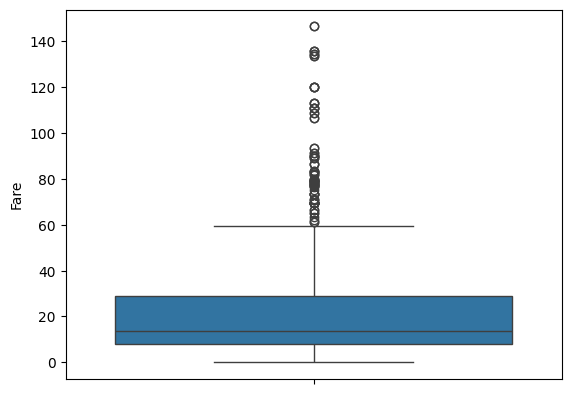

In [52]:
sns.boxplot(data=df_training,y=df_training['Fare'])